In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [3]:
data = pd.DataFrame(pd.read_excel(r'C:\Users\Kobiz\Documents\Term_2\AI_Tech\Project\SmartTrrfficAI\Testdatav2.xlsx'))

In [5]:
df = pd.DataFrame(data)

# Extract intersection data into arrays
intersection_arrays = []
for _, row in df.iterrows():
    intersection_data = []
    for i in range(1, 5):  # Assuming there are always 4 intersections
        intersection_data.append(row[f'InterSection{i}'])
    intersection_arrays.append(intersection_data)

print(intersection_arrays)

[[8, 1, 0, 1], [7, 2, 1, 4], [7, 3, 2, 5], [7, 7, 3, 7], [5, 8, 4, 5], [4, 4, 5, 4], [7, 4, 6, 7], [8, 4, 7, 5], [1, 5, 8, 1], [4, 1, 0, 7], [2, 5, 1, 2], [6, 8, 2, 4], [8, 8, 3, 2], [9, 4, 4, 3], [3, 6, 5, 5], [3, 1, 6, 2], [6, 8, 7, 8], [5, 7, 8, 2], [5, 2, 0, 4], [4, 5, 1, 5], [2, 6, 2, 3], [1, 1, 3, 1], [3, 6, 4, 7], [8, 4, 5, 8], [0, 8, 6, 3], [4, 0, 7, 6], [5, 2, 8, 5], [3, 4, 0, 4], [0, 6, 1, 2], [0, 8, 2, 3], [4, 5, 3, 5], [7, 3, 4, 6], [8, 9, 5, 4], [9, 1, 6, 7], [9, 7, 7, 8], [5, 4, 8, 1], [1, 1, 0, 2], [2, 2, 1, 4], [3, 3, 2, 3]]


In [7]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Green light times data
green_light_times = {
    (0,): 0,
    (1,): 10,
    (2,): 15,
    (3,): 20,
    (4,): 25,
    (5,): 30,
    (6,): 35,
    (7,): 40,
    (8,): 45
}

# Convert green light times data to arrays for training
x_train = np.array(list(green_light_times.keys())).reshape((-1, 1))  # Reshape for compatibility with sklearn
y_train = np.array(list(green_light_times.values()))

# Instantiate PolynomialFeatures object to generate polynomial features
poly = PolynomialFeatures(degree=2)

# Transform the input features to include polynomial features
x_train_poly = poly.fit_transform(x_train)

# Train polynomial regression model
model = LinearRegression()
model.fit(x_train_poly, y_train)

# Define a function to predict green light time for a given number of cars
def predict_green_light_time(cars):
    total_time = 0
    for car in cars:
        car_array = np.array([[car]])  # Reshape the input for compatibility with model prediction
        car_array_poly = poly.transform(car_array)  # Transform input for polynomial regression
        predicted_time = model.predict(car_array_poly)[0]
        total_time += predicted_time
    return total_time

# Test input
test_input = intersection_arrays

# Predict green light time for each row in the test input
for i, row in enumerate(test_input):
    predicted_times = [model.predict(poly.transform(np.array([[car]])))[0] for car in row]
    total_time = sum(predicted_times)
    predicted_times_rounded = [round(time) for time in predicted_times]
    total_time_rounded = round(total_time)
    print(f"Row {i + 1}: Predicted times: {predicted_times_rounded}, Total predicted time: {total_time_rounded}")


Row 1: Predicted times: [44, 8, 2, 8], Total predicted time: 62
Row 2: Predicted times: [40, 14, 8, 25], Total predicted time: 88
Row 3: Predicted times: [40, 20, 14, 31], Total predicted time: 105
Row 4: Predicted times: [40, 40, 20, 40], Total predicted time: 140
Row 5: Predicted times: [31, 44, 25, 31], Total predicted time: 131
Row 6: Predicted times: [25, 25, 31, 25], Total predicted time: 107
Row 7: Predicted times: [40, 25, 36, 40], Total predicted time: 141
Row 8: Predicted times: [44, 25, 40, 31], Total predicted time: 141
Row 9: Predicted times: [8, 31, 44, 8], Total predicted time: 91
Row 10: Predicted times: [25, 8, 2, 40], Total predicted time: 75
Row 11: Predicted times: [14, 31, 8, 14], Total predicted time: 67
Row 12: Predicted times: [36, 44, 14, 25], Total predicted time: 120
Row 13: Predicted times: [44, 44, 20, 14], Total predicted time: 123
Row 14: Predicted times: [48, 25, 25, 20], Total predicted time: 119
Row 15: Predicted times: [20, 36, 31, 31], Total predicte

In [8]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate Mean Absolute Error (MAE)
y_pred = model.predict(x_train_poly)
mae = mean_absolute_error(y_train, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared (R2)
r2 = r2_score(y_train, y_pred)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 0.7542087542087494
R-squared (R2): 0.9950733137829912


Mean Absolute Error (MAE): This metric calculates the average absolute difference between the predicted values and the actual values. Lower values indicate better performance.
R-squared (R2) Score: This metric measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, with higher values indicating better fit.

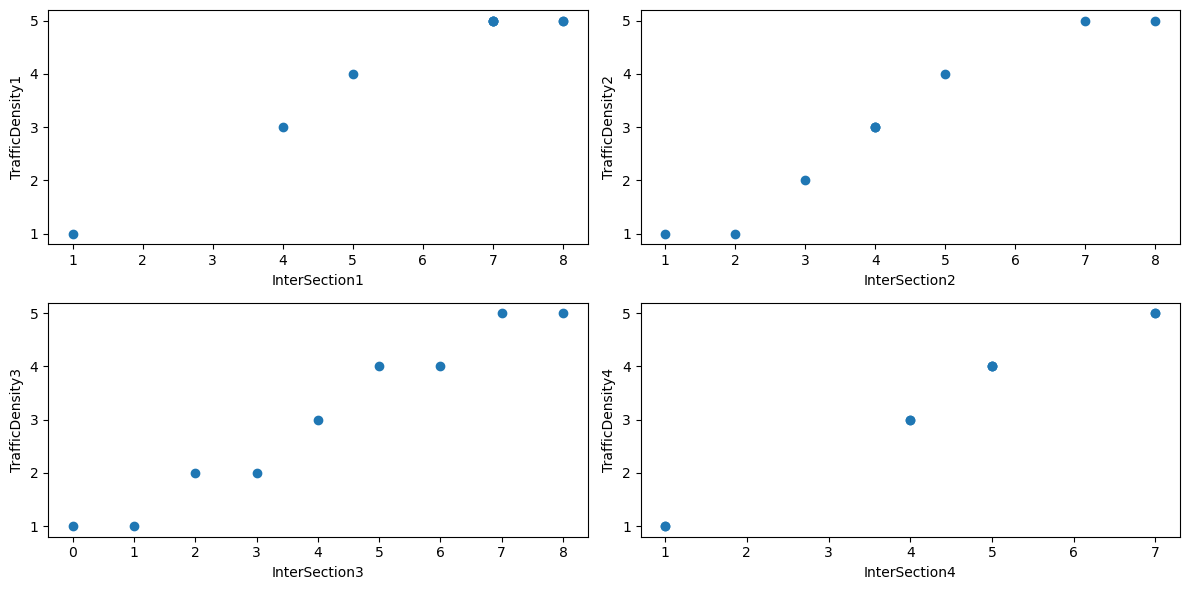

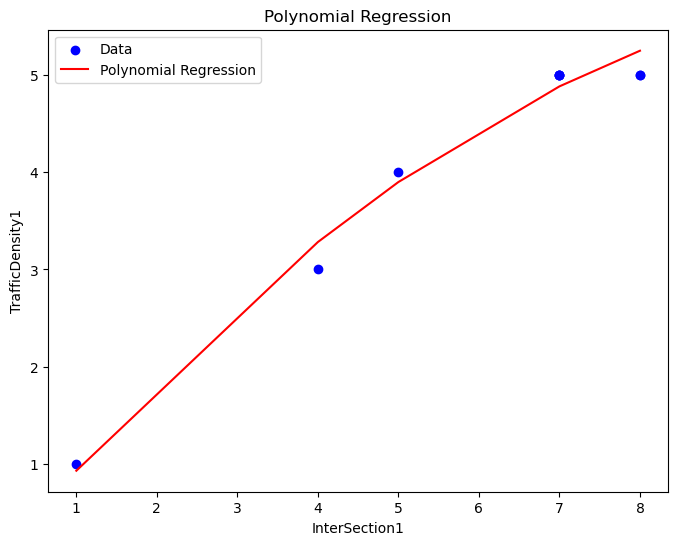

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Sample data
data = {
    'InterSection1': [8, 7, 7, 7, 5, 4, 7, 8, 1],
    'TrafficDensity1': ['Very Heavy', 'Very Heavy', 'Very Heavy', 'Very Heavy', 'Heavy', 'Moderate', 'Very Heavy', 'Very Heavy', 'Very Light'],
    'InterSection2': [1, 2, 3, 7, 8, 4, 4, 4, 5],
    'TrafficDensity2': ['Very Light', 'Very Light', 'Light', 'Very Heavy', 'Very Heavy', 'Moderate', 'Moderate', 'Moderate', 'Heavy'],
    'InterSection3': [0, 1, 2, 3, 4, 5, 6, 7, 8],
    'TrafficDensity3': ['Very Light', 'Very Light', 'Light', 'Light', 'Moderate', 'Heavy', 'Heavy', 'Very Heavy', 'Very Heavy'],
    'InterSection4': [1, 4, 5, 7, 5, 4, 7, 5, 1],
    'TrafficDensity4': ['Very Light', 'Moderate', 'Heavy', 'Very Heavy', 'Heavy', 'Moderate', 'Very Heavy', 'Heavy', 'Very Light']
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Map categorical data to numerical values (for simplicity)
traffic_density_mapping = {'Very Light': 1, 'Light': 2, 'Moderate': 3, 'Heavy': 4, 'Very Heavy': 5}
df['TrafficDensity1'] = df['TrafficDensity1'].map(traffic_density_mapping)
df['TrafficDensity2'] = df['TrafficDensity2'].map(traffic_density_mapping)
df['TrafficDensity3'] = df['TrafficDensity3'].map(traffic_density_mapping)
df['TrafficDensity4'] = df['TrafficDensity4'].map(traffic_density_mapping)

# Plot scatter plots
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.scatter(df['InterSection1'], df['TrafficDensity1'])
plt.xlabel('InterSection1')
plt.ylabel('TrafficDensity1')

plt.subplot(2, 2, 2)
plt.scatter(df['InterSection2'], df['TrafficDensity2'])
plt.xlabel('InterSection2')
plt.ylabel('TrafficDensity2')

plt.subplot(2, 2, 3)
plt.scatter(df['InterSection3'], df['TrafficDensity3'])
plt.xlabel('InterSection3')
plt.ylabel('TrafficDensity3')

plt.subplot(2, 2, 4)
plt.scatter(df['InterSection4'], df['TrafficDensity4'])
plt.xlabel('InterSection4')
plt.ylabel('TrafficDensity4')

plt.tight_layout()
plt.show()

# Perform Polynomial Regression on a selected variable (e.g., InterSection1)
X = df[['InterSection1']].values
y = df['TrafficDensity1'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate PolynomialFeatures object to generate polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Visualize polynomial regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(np.sort(X, axis=0), model.predict(poly.transform(np.sort(X, axis=0))), color='red', label='Polynomial Regression')
plt.xlabel('InterSection1')
plt.ylabel('TrafficDensity1')
plt.title('Polynomial Regression')
plt.legend()
plt.show()
